# Self Data Analysis 1  

Titanic Dataset from: https://www.kaggle.com/competitions/titanic/data?select=train.csv   
This is round 2 after linear regression didn't work well.   
Arush Bodla

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("data/titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I'm going to remove all of the columns with fully unique values since they wouldn't be of much use. I'll also do some preprocessing.

In [5]:
from sklearn.preprocessing import OrdinalEncoder


data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors="ignore", inplace=True)
data.dropna(inplace=True)
encoder = OrdinalEncoder()
for col in data.select_dtypes("object").columns:
    data[col] = encoder.fit_transform(data[[col]])

0.4044943820224719


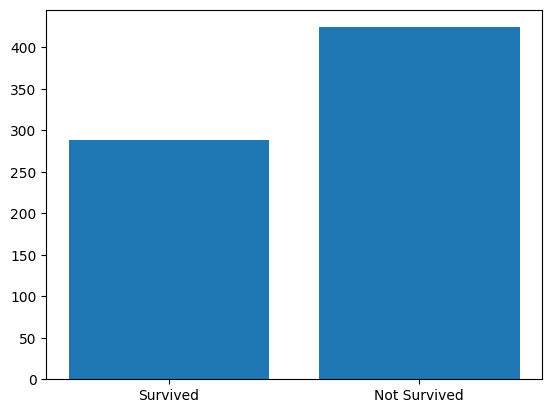

In [6]:
survived = data[data["Survived"] == 1]
not_survived = data[data["Survived"] == 0]
plt.bar(["Survived", "Not Survived"], [survived.shape[0], not_survived.shape[0]])
print(np.mean(data["Survived"]))

About 40% of the people survived, which means the data is somewhat balanced. I'll see if there's any colinearity in the data.


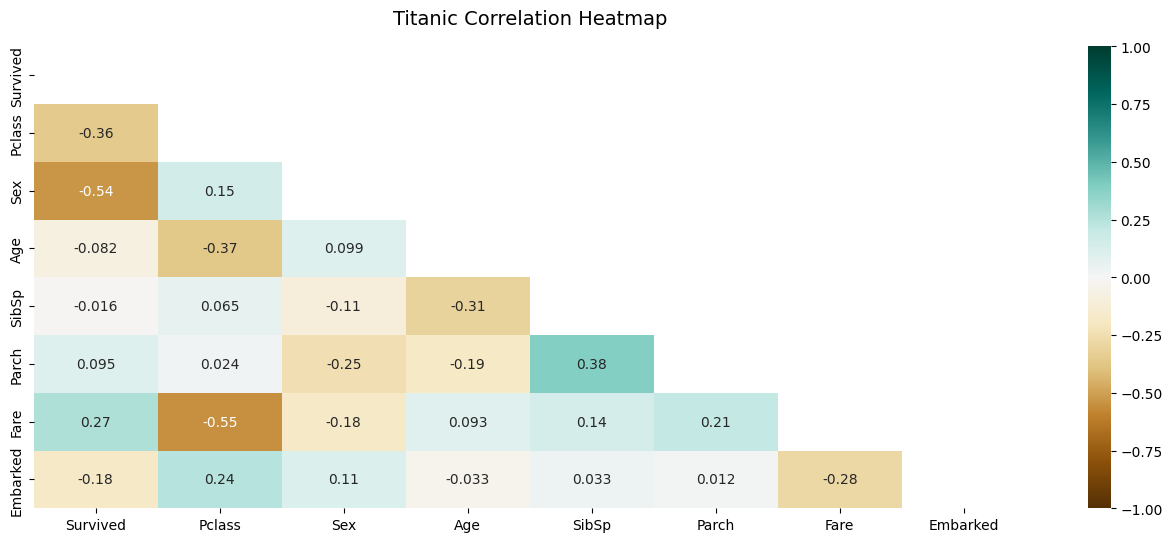

In [7]:
corr_matrix = data.corr()
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Titanic Correlation Heatmap', fontdict={'fontsize':14}, pad=16);
plt.show()

There's not much colinearity, so i'll leave the columns in. I'll plot Pclass vs Fare and Survived vs Sex, to see if the correlation is strong.

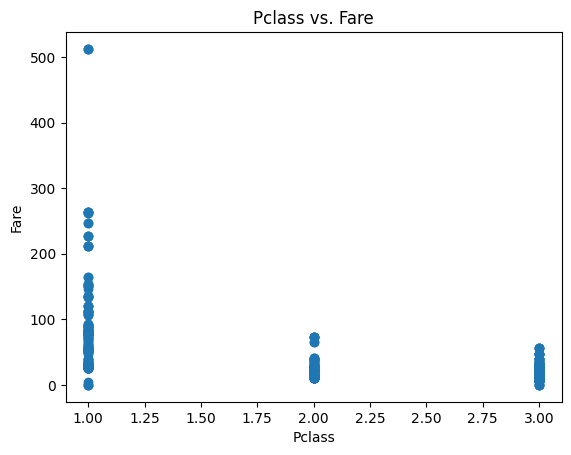

In [8]:
plt.scatter(data["Pclass"], data["Fare"])
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.title("Pclass vs. Fare")
plt.show()

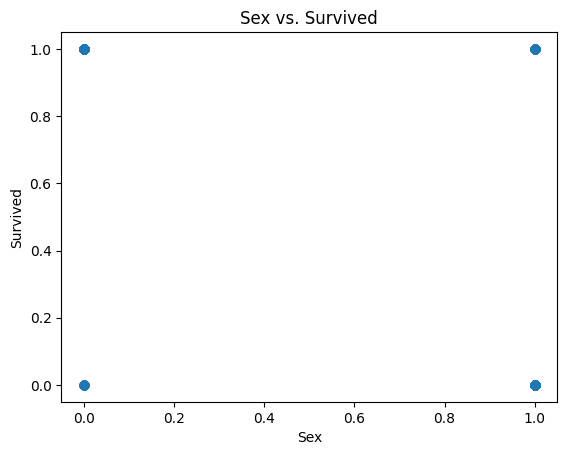

In [9]:
plt.scatter(data["Sex"], data["Survived"])
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.title("Sex vs. Survived")
plt.show()

Plotting these didn't really produce anything useful, except the one outlier in the fare. I'll just leave the data as-is since I can't conclude much.

## Helper Methods

In [10]:
def accuracy(model, X_test, y_test):
    cm = confusion_matrix(y_test, model.predict(X_test))
    return (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
#return the fraction of total guesses that are correct

## Testing Various Models

In [11]:
X = data.drop(columns=["Survived"])
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### K nearest neighbors

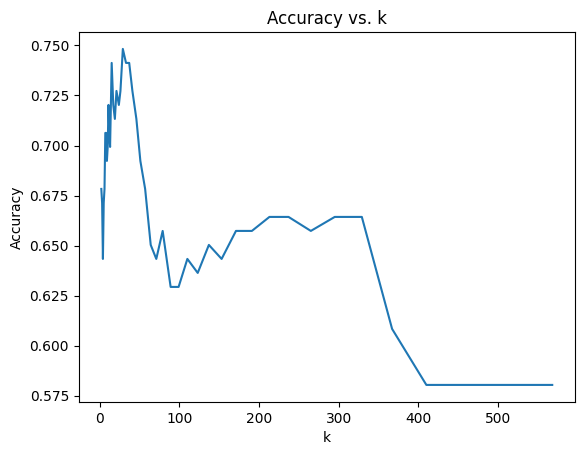

Best k: 29 
Accuracy: 0.7482517482517482


In [12]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

k_values = np.unique(np.logspace(1, np.log(X_train.shape[0]), 50, base=np.e)).astype(int)
scores = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(accuracy(model, X_test, y_test))
    
plt.title("Accuracy vs. k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.plot(k_values, scores)
plt.show()
print("Best k:", k_values[np.argmax(scores)], "\nAccuracy:", np.max(scores))
knnbestk = k_values[np.argmax(scores)]

It looks like k=20-30 is the best amount, but the model is not that great. I'll see if other parameters can make it better.

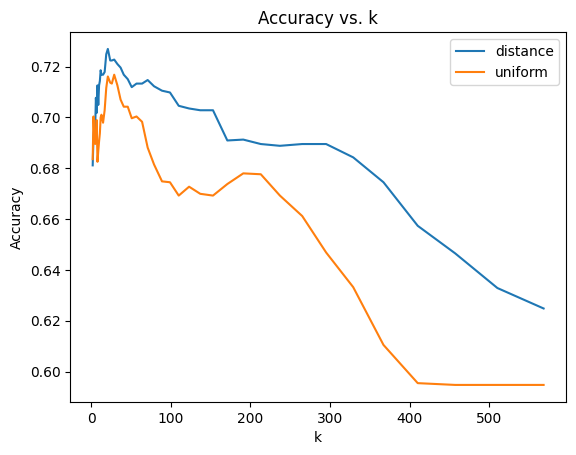

In [13]:
def test_distance_uniform():
    scored = []
    scoreu = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k, weights="distance")
        model.fit(X_train, y_train)
        scored.append(accuracy(model, X_test, y_test))
        model = KNeighborsClassifier(n_neighbors=k, weights="uniform")
        model.fit(X_train, y_train)
        scoreu.append(accuracy(model,X_test, y_test))
    return np.array(scored), np.array(scoreu)

scoredtotal = np.zeros(len(k_values))
scoreutotal = np.zeros(len(k_values))
for i in range(20):
    scored, scoreu = test_distance_uniform()
    scoredtotal += scored
    scoreutotal += scoreu
    
scored = scoredtotal / (20)
scoreu = scoreutotal / (20)

plt.title("Accuracy vs. k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.plot(k_values, scored, label="distance")
plt.plot(k_values, scoreu, label="uniform")
plt.legend()
plt.show()

In [14]:
print("Best k (distance):", k_values[np.argmax(scored)], "\nAccuracy:", np.max(scored))
print("Best k (uniform):", k_values[np.argmax(scoreu)], "\nAccuracy:", np.max(scoreu))

Best k (distance): 21 
Accuracy: 0.726923076923077
Best k (uniform): 29 
Accuracy: 0.7167832167832167


Looks like distance is the better option. Also, the original test train split looks like it's very forgiving to the model, since the average of 20 splits tank the accuracy.

Brute Force: 0.7482517482517482
KD Tree: 0.7482517482517482
Ball Tree: 0.7482517482517482


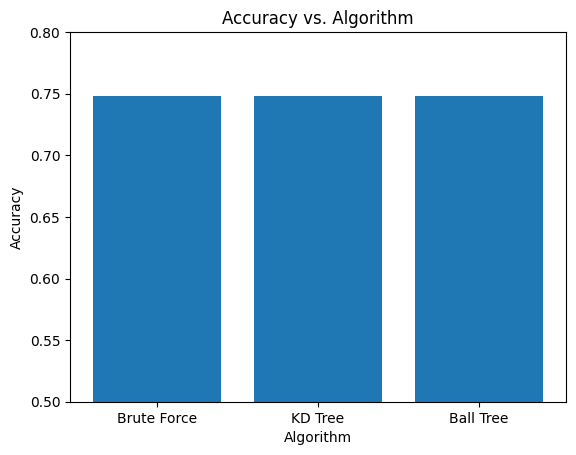

In [15]:
model = KNeighborsClassifier(n_neighbors=knnbestk, weights="distance", algorithm="brute")
model.fit(X_train, y_train)
brute = accuracy(model, X_test, y_test)

model = KNeighborsClassifier(n_neighbors=knnbestk, weights="distance", algorithm="kd_tree")
model.fit(X_train, y_train)
kd_tree = accuracy(model, X_test, y_test)

model = KNeighborsClassifier(n_neighbors=knnbestk, weights="distance", algorithm="ball_tree")
model.fit(X_train, y_train)
ball_tree = accuracy(model, X_test, y_test)

print("Brute Force:", brute)
print("KD Tree:", kd_tree)
print("Ball Tree:", ball_tree)

plt.title("Accuracy vs. Algorithm")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.bar(["Brute Force", "KD Tree", "Ball Tree"], [brute, kd_tree, ball_tree])
plt.ylim(0.5, 0.8)
plt.show()

They're the exact same, so I'll leave the algorithm at auto. The final KNN classifier is below:

In [16]:
model = KNeighborsClassifier(n_neighbors=knnbestk, weights="distance", algorithm="auto")
model.fit(X_train, y_train)
print("Accuracy: ", accuracy(model, X_test, y_test))

Accuracy:  0.7482517482517482


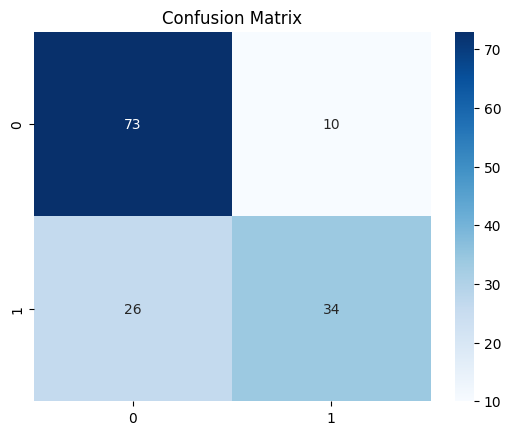

In [17]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, model.predict(X_test))

plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()

That's a decent imrovement over linear regression, about 5-6% more. (For context, the linear regression model got 68% accuracy.) As for the correlation matrix, I don't have anything to go off yet, so I'm assuming the model is doing well.

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000) #arbitrary for convergence
model.fit(X_train, y_train)
print("Accuracy: ", accuracy(model, X_test, y_test))

Accuracy:  0.8391608391608392


This is much better than KNN, without even setting any parameters. I'll look at the max iterations first.

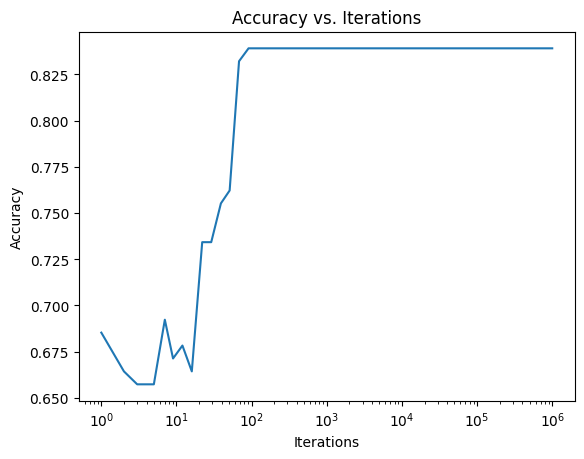

In [24]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
#suppress convergence warnings


iters = np.unique(np.logspace(0, 6, 50, base=10)).astype(int)
acc = []


for i in iters:
    model = LogisticRegression(max_iter=i, )
    model.fit(X_train, y_train)
    acc.append(accuracy(model, X_test, y_test))

plt.title("Accuracy vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.xscale("log")
plt.plot(iters, acc)
plt.show()

In [25]:
bestiter = iters[np.argmax(acc)]
print("Best iterations:", bestiter, "\nAccuracy:", np.max(acc))

Best iterations: 91 
Accuracy: 0.8391608391608392


The best number of iterations is 90-100, and it doesn't make a difference past that.